In [92]:
#IN THIS PROJECT I HAVE ANALYZED THE PERFORMANCE OF RANDOM FOREST CLASSIFIER FOR BREAST CANCER DATASET.


from sklearn.datasets import load_breast_cancer
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
import matplotlib.pyplot as plt
import numpy as np


In [93]:
cancer=load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [94]:
print(cancer.feature_names)
xtr,xte,ytr,yte=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=0)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [95]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100,random_state=0,max_depth=4)
forest.fit(xtr,ytr)


RandomForestClassifier(max_depth=4, random_state=0)

In [96]:
print("forest train accuracy = {}".format(forest.score(xtr,ytr)))
print("forest test accuracy = {}".format(forest.score(xte,yte)))

forest train accuracy = 0.9953051643192489
forest test accuracy = 0.9440559440559441


In [132]:
tra=[]
tea=[]
n_est=range(1,50)
for n in n_est:
    forest=RandomForestClassifier(n_estimators=n,random_state=0,max_depth=4).fit(xtr,ytr)
    tra.append(forest.score(xtr,ytr))
    tea.append(forest.score(xte,yte))


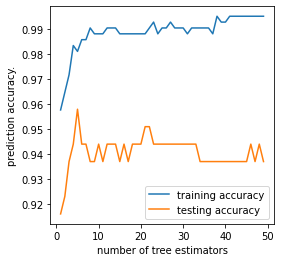

In [133]:
fig,axes=plt.subplots(1,1,figsize=(4,4))
axes.set_xlabel("number of tree estimators")
axes.set_ylabel("prediction accuracy.")

plt.plot(n_est,tra)
plt.plot(n_est,tea) 
plt.legend(["training accuracy", "testing accuracy"])

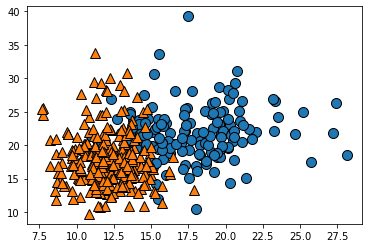

In [135]:
mglearn.discrete_scatter(xtr[:, 0], xtr[:, 1], ytr)


In [136]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")


TypeError: 'str' object is not callable

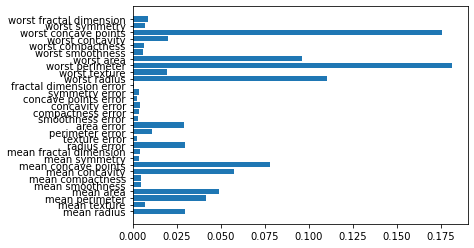

In [137]:
plot_feature_importances_cancer(forest)